## Water Analysis 

Considering the data available in data.austintexas.gov and waterdata.usgs.gov to get the datasets of the basin recharge and Water consumption according to the Customer Class​ we analized how El Nino/Nina effect impact the water recharge and Water consumption in Austin Metro. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy import stats
import requests
import os
import csv
from pathlib import Path


In [2]:
# Study data files
aquifer_metadata_path = "datasets/archive/Edwards_Aquifer_annual_recharge_2000_2020.csv"
Residential_Water_data_path = "datasets/archive/Austin_Water_-_Residential_Water_Consumption.csv"

# Read the water data and the study results
aquifer_metadata = pd.read_csv(aquifer_metadata_path)
Residential_Water_data = pd.read_csv(Residential_Water_data_path)

# Combine the data 

Residential_Water_data['Year'] = Residential_Water_data ['Year Month'].str.split ('/').str [0]

Residential_Water_data['Year'] = Residential_Water_data['Year'].astype(int)
Residential_Water_data['Year'] = pd.to_numeric(Residential_Water_data['Year'])

Residential_Water_data['Total Gallons'] = Residential_Water_data['Total Gallons'].astype(int)

# Combine the data into a single DataFrame

water_complete_complete = (pd.merge(aquifer_metadata, Residential_Water_data, how="inner", on=["Year"]))
water_complete_complete = water_complete_complete.drop(['Year Month'], axis=1)

# Display the data table for preview
water_complete_complete.head()

,Year,Basin_1,Basin_2,Basin_3,Basin_4,Basin_5,Basin_6,Basin_7,Basin_9,Total,Postal Code,Customer Class,Total Gallons
0,2012,78.3,82.6,8.9,14.4,41.6,3.9,32.2,51.6,313.5,78613,Irrigation - Multi-Family,11000
1,2012,78.3,82.6,8.9,14.4,41.6,3.9,32.2,51.6,313.5,78613,Multi-Family,23000
2,2012,78.3,82.6,8.9,14.4,41.6,3.9,32.2,51.6,313.5,78617,Residential,19840800
3,2012,78.3,82.6,8.9,14.4,41.6,3.9,32.2,51.6,313.5,78617,Multi-Family,2477000
4,2012,78.3,82.6,8.9,14.4,41.6,3.9,32.2,51.6,313.5,78652,Irrigation - Residential,38500


In [3]:
# Rename and Display the info about the basins  from 2012-2020

aquifer_metadata.rename({'Basin_1':'Basin 1','Basin_2':'Basin 2', 'Basin_3':'Basin 3', 'Basin_4':'Basin 4', 'Basin_5': 'Basin 5',
'Basin_6':'Basin 6', 'Basin_7': 'Basin 7', 'Basin_9': 'Basin 9'}, axis = 1, inplace = True)

# Display the Dataframe

aquifer_metadata.head(22)

,Year,Basin 1,Basin 2,Basin 3,Basin 4,Basin 5,Basin 6,Basin 7,Basin 9,Total
0,2000,238.4,123.0,33.10,55.20,53.4,28.60,48.6,34.1,614.5
1,2001,297.5,126.7,66.20,124.10,90.0,101.50,173.7,89.7,1069.4
2,2002,83.6,207.3,70.60,345.20,93.7,175.50,447.8,150.0,1573.7
3,2003,149.8,112.2,31.70,67.40,86.8,56.20,105.0,59.9,669.0
4,2004,481.9,424.5,116.00,343.90,95.5,213.40,315.0,185.8,2176.1
5,2005,105.5,147.2,50.10,79.10,82.8,84.80,140.4,74.1,764.0
6,2006,45.5,60.2,9.00,5.00,47.7,5.10,11.2,17.9,201.6
7,2007,471.8,474.4,104.00,406.40,75.2,227.60,306.1,96.9,2162.3
8,2008,48.2,44.5,5.90,9.80,53.6,9.60,22.8,18.5,212.9
9,2009,58.5,30.3,1.80,13.50,45.6,7.30,26.4,27.5,211.0


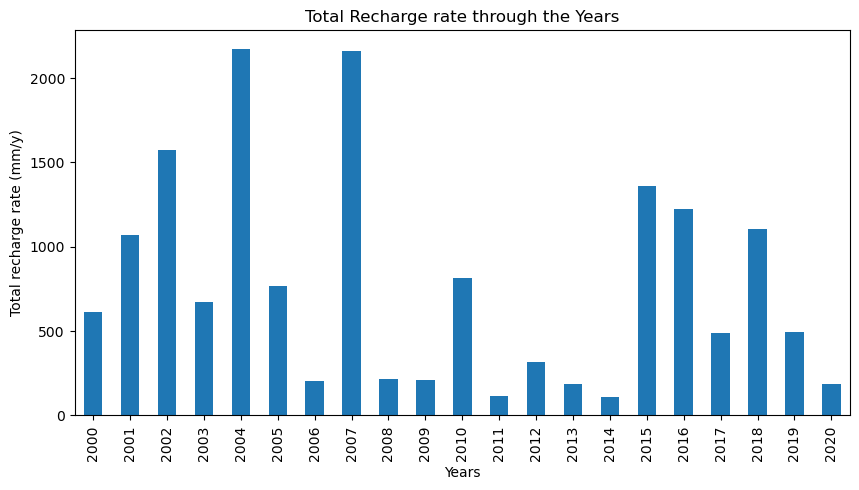

In [7]:
# Generate a bar plot showing the total number of rows (Year/ Total Gallons) for each basin Pandas.

basindf = aquifer_metadata.groupby('Year')['Total'].sum()

# Create a bar plot using the Year total series
basindf.plot(kind='bar', figsize=(10,5))

# Set the title and axis labels
plt.xlabel('Years')
plt.ylabel('Total recharge rate (mm/y)')
plt.title('Total Recharge rate through the Years')

# Display the plot
plt.show()

In [5]:
#Import the data set of el nino/nina effect and filtered by Year 

NinoNina = Path('./Resources/Nino_Nina_Timeline.xlsx')
NinoNina_df = pd.read_excel(NinoNina)
NinoNina_filtered_date_df=NinoNina_df.loc[NinoNina_df['Year']>=2000]

#Display the Dataframe

NinoNina_filtered_date_df

,Year,Effect,Strength
48,2000,Nina,Weak
49,2001,None,NaN
50,2002,Nino,Moderate
51,2003,None,NaN
52,2004,Nino,Weak
53,2005,Nina,Weak
54,2006,Nino,Weak
55,2007,Nina,Strong
56,2008,Nina,Weak
57,2009,Nino,Moderate


In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following : 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

summary_df2 = water_complete_complete.groupby('Customer Class')['Total Gallons'].agg(['mean', 'median', 'var', 'std','sem'])
summary_df2

,mean,median,var,std,sem
Customer Class,,,,,
Irrigation - Multi-Family,1.853053e+06,997750.0,5.264581e+12,2.294467e+06,36415.531466
Irrigation - Residential,9.377354e+04,22950.0,5.869516e+10,2.422708e+05,3960.493009
Multi-Family,1.694487e+07,13057200.0,2.870086e+14,1.694133e+07,255168.252711
Residential,2.735767e+07,20781150.0,5.720986e+14,2.391858e+07,348888.380039


In [8]:
#Using groupby to determinate the mean of water consumption of total gallons per customer class

Custumer_class = water_complete_complete.groupby('Customer Class')['Total Gallons'].mean()

#Display of the Dataframe
Custumer_class.head()

Customer Class
Irrigation - Multi-Family    1.853053e+06
Irrigation - Residential     9.377354e+04
Multi-Family                 1.694487e+07
Residential                  2.735767e+07
Name: Total Gallons, dtype: float64

In [9]:
#Using groupby to determinate the sum of water consumption of total gallons per customer class

Custumer_class = water_complete_complete.groupby(['Year', 'Customer Class'])['Total Gallons'].sum()

#Display of the dataframe
Custumer_class.head()

Year  Customer Class           
2012  Irrigation - Multi-Family      764143300
      Irrigation - Residential        46482000
      Multi-Family                  8235931400
      Residential                  16623202300
2013  Irrigation - Multi-Family      723146500
Name: Total Gallons, dtype: int64

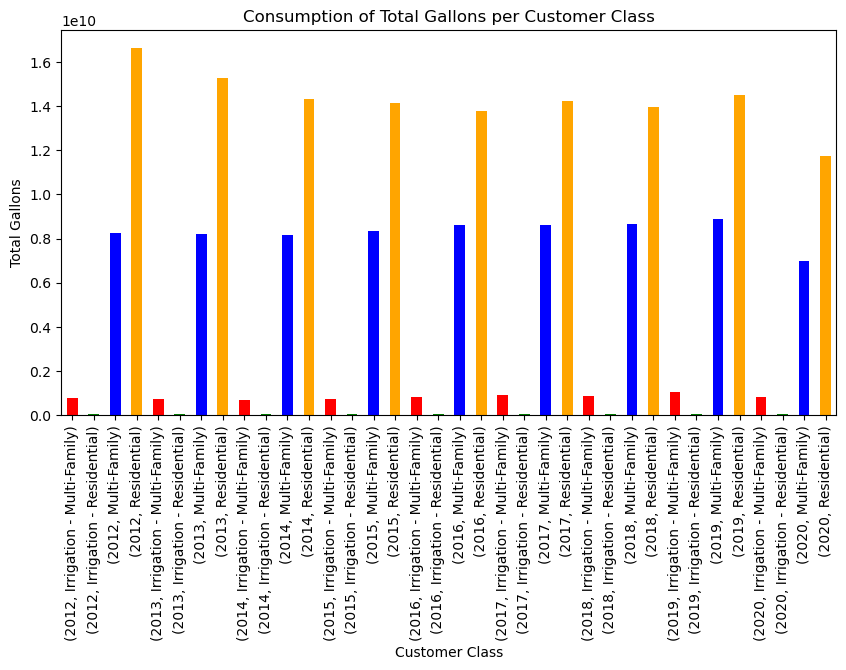

In [10]:
# Generate a bar plot showing the total number of rows (Year/Total Gallons) for each Customer Class using Pandas.
Custumer_class = water_complete_complete.groupby(['Year', 'Customer Class'])['Total Gallons'].sum()

# Create a bar plot using the  series
color_palette = ['red', 'green', 'blue', 'orange']
Custumer_class.plot(kind='bar', figsize=(10,5), stacked=False, color=color_palette)

# Set the title and axis labels
plt.xlabel('Customer Class')
plt.ylabel('Total Gallons')
plt.title('Consumption of Total Gallons per Customer Class')

# Display the plot
plt.show()

### El nino and la Nina Effect over Austin


In [138]:
import pandas as pd
import numpy as np
import requests
import os 
import csv
import matplotlib.pyplot as plt
from pathlib import Path
import scipy.stats as st
from scipy import stats


In [122]:
NinoNina = Path("Resources/Nino_Nina_Timeline.xlsx")
NinoNina_df = pd.read_excel(NinoNina)
NinoNina_filtered_date_df=NinoNina_df.loc[NinoNina_df['Year']>=2000]
NinoNina_filtered_date_df
Strength=[]
for x in range(len(NinoNina_filtered_date_df.index)):
    
    if NinoNina_filtered_date_df.iloc[x,1]=="Nina":
        if NinoNina_filtered_date_df.iloc[x,2]=="Weak":
                Strength.append(-1)
        elif NinoNina_filtered_date_df.iloc[x,2]=="Moderate":
                Strength.append(-2)                        
        elif NinoNina_filtered_date_df.iloc[x,2]=="Strong":
                Strength.append(-3)                           
        elif NinoNina_filtered_date_df.iloc[x,2]=="Very Strong":
                Strength.append(-4)                                                            
    elif NinoNina_filtered_date_df.iloc[x,1]=="Nino":
        if NinoNina_filtered_date_df.iloc[x,2]=="Weak":
                Strength.append(1)
        elif NinoNina_filtered_date_df.iloc[x,2]=="Moderate":
                Strength.append(2)                        
        elif NinoNina_filtered_date_df.iloc[x,2]=="Strong":
                Strength.append(3)                           
        elif NinoNina_filtered_date_df.iloc[x,2]=="Very Strong":
                Strength.append(4)
    elif NinoNina_filtered_date_df.iloc[x,1]=="None":
           Strength.append(0)
NinoNina_filtered_date_df['Intensity']=Strength
NinoNina_filtered_date_df.head()
#This final Df goal is to be able to quantify each year to a intensity value. Nino Efects are positive while nina efects are negative.

C:\Users\Leo\AppData\Local\Temp\ipykernel_31840\72508692.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NinoNina_filtered_date_df['Intensity']=Strength


,Year,Effect,Strength,Intensity
48,2000,Nina,Weak,-1
49,2001,None,NaN,0
50,2002,Nino,Moderate,2
51,2003,None,NaN,0
52,2004,Nino,Weak,1


In [148]:
#os.chdir(os.path.dirname(os.path.realpath(__file__)))
water_level_csv = Path("Resources/Lake_travis_water.xlsx")
water_travis_df = pd.read_excel(water_level_csv)

water_travis_df=water_travis_df.drop([0])

water_travis_df.rename({'Unnamed: 0':"Date", "Unnamed: 1":"Water Level ", "Unnamed: 2":"Surface Area", "Unnamed: 3":"Reservoir Storage ", "Unnamed: 4":"Conservation Storage", "Unnamed: 5":"Percent Full","Unnamed: 6":"Conservation Capacity ", "Unnamed: 7":"Dead Pool Capacity"}, axis=1, inplace=True)

water_travis_df.head()

water_travis_df['Date'] = pd.to_datetime(water_travis_df['Date'])
water_travis_df["date2"]=water_travis_df["Date"].dt.strftime('%Y-%m')

water_travis_df = water_travis_df.drop('Date', axis=1)
water_travis_df.rename({"date2":"Date"}, axis=1, inplace=True)
water_travis_df['Date'] = pd.to_datetime(water_travis_df['Date'])
start_date = '2000-01-01'
water_travis_dated_df=water_travis_df.loc[water_travis_df['Date']>=start_date]
water_travis_dated_df=water_travis_dated_df.drop_duplicates(subset=['Date'], keep='last')
water_travis_dated_df.head(10)
#Now I have per month levels or water for lake travis start from 2000


,Water Level,Surface Area,Reservoir Storage,Conservation Storage,Percent Full,Conservation Capacity,Dead Pool Capacity,Date
20969,663.65,15010,838198,816773,73.3,1113531,21425,2000-01-01
20998,664.17,15120.7,846032,824607,74.1,1113531,21425,2000-02-01
21029,663.38,14952.6,834153,812728,73,1113531,21425,2000-03-01
21059,659.92,14213.8,783726,762301,68.5,1113531,21425,2000-04-01
21090,655.9,13416,728203,706778,63.5,1113531,21425,2000-05-01
21120,651.09,12526.1,665820,644395,57.9,1113531,21425,2000-06-01
21151,644.87,11331.9,591436,570011,51.2,1113531,21425,2000-07-01
21182,643.76,11093.6,579012,557587,50.1,1113531,21425,2000-08-01
21212,641.06,10673,549636,528211,47.4,1113531,21425,2000-09-01
21243,648.43,12042.4,633147,611722,54.9,1113531,21425,2000-10-01


<Axes: xlabel='Year'>

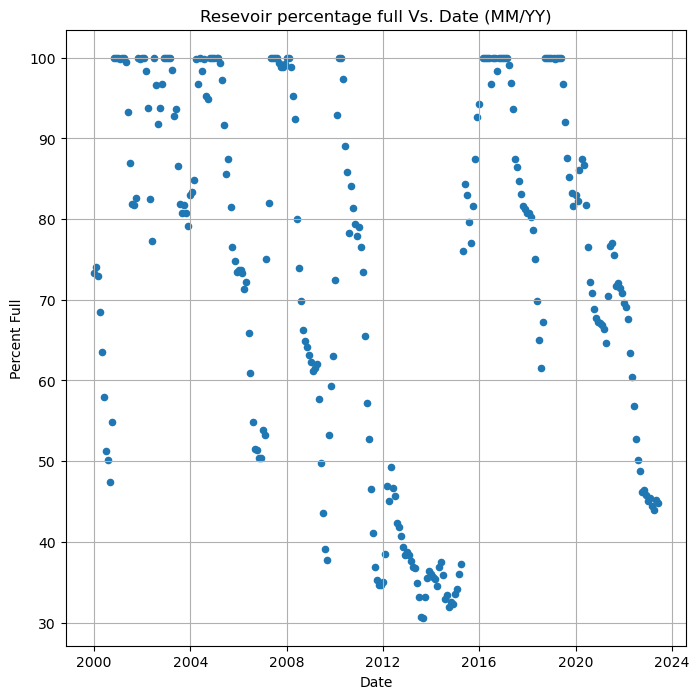

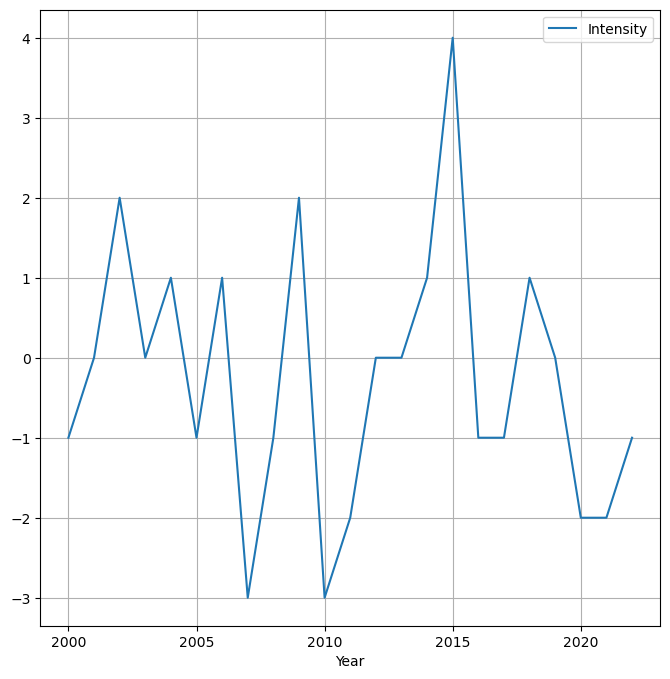

In [134]:

water_travis_dated_df.plot(kind="scatter", y="Percent Full", x="Date", grid=True, figsize=(8,8),
              title="Resevoir percentage full Vs. Date (MM/YY)")
NinoNina_filtered_date_df.plot(kind="line", y="Intensity", x="Year", grid=True, figsize=(8,8),)

In [153]:
NinoNina_filtered_date_df['Year'] = pd.to_datetime(NinoNina_filtered_date_df['Year'],format = '%Y')
NinoNina_filtered_date_df.dtypes

C:\Users\Leo\AppData\Local\Temp\ipykernel_31840\371251119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  NinoNina_filtered_date_df['Year'] = pd.to_datetime(NinoNina_filtered_date_df['Year'],format = '%Y')


Year         datetime64[ns]
Effect               object
Strength             object
Intensity             int64
dtype: object

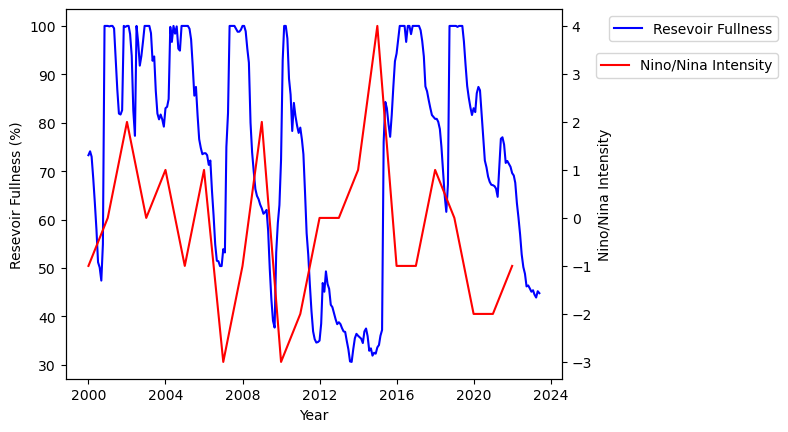

In [183]:
#plt.figure(figsize=(16, 8), dpi=150)
#water_travis_dated_df['Percent Full'].plot(label='Tesla', color='orange')
#NinoNina_filtered_date_df['Intensity'].plot(label='GM')
#plt.legend()
import matplotlib.pyplot as plt 




fig, ax1 = plt.subplots()


ax1.plot(water_travis_dated_df['Date'],water_travis_dated_df['Percent Full'], label="Resevoir Fullness",color='blue')
ax1.set_ylabel('Resevoir Fullness (%)')
ax2 = ax1.twinx()
ax2.plot(NinoNina_filtered_date_df['Year'],NinoNina_filtered_date_df['Intensity'], label="Nino/Nina Intensity",color="red")
ax2.set_ylabel('Nino/Nina Intensity')

ax1.set_xlabel('Year')
legend1 = ax1.legend(loc='upper right',bbox_to_anchor=(1.450, 1))
legend2 = ax2.legend(loc='upper right',bbox_to_anchor=(1.450, 0.9))
# Combine the legends
#plt.gca().add_artist(legend1)

#plt.legend(loc='upper right',bbox_to_anchor=(1.50, 1))
plt.show()

In [ ]:
Power_csv=Path("Resources/System_Production_Cost.csv")
Power_df=pd.read_csv(Power_csv)
Power_df.head()
Power_df=Power_df.sort_values(by=["Fiscal Year"],ascending=True)
Power_dated_df=Power_df.loc[Power_df['Fiscal Year']>=2000]
Power_dated_df.head()
#Now, I want to ajust cost Per KWh by inflation



,Fiscal Year,Electricity Usage (Kwh),Total Electricity Cost,Natural Gas Usage (Mcf),Total Natural Gas Cost,Other Energy Cost,Cost Per KWh
22,2000,"57,455,808","$2,402,778","4,601,733","$14,635,470","$20,499,280",$0.0418
21,2001,"56,522,415","$2,385,745","4,591,858","$25,351,745","$22,519,073",$0.0422
20,2002,"57,917,877","$3,169,384","4,396,375","$16,267,195","$22,435,101",$0.0547
19,2003,"59,933,038","$3,227,553","4,227,407","$17,006,112","$23,603,677",$0.0539
18,2004,"62,127,352","$3,726,099","4,943,169","$21,365,440","$28,500,498",$0.0600


In [ ]:
Inflation_csv=Path("Resources/Yearly_Inflation_Rate.xlsx")
Inflation_df=pd.read_excel(Inflation_csv)
Inflation_dated_df=Inflation_df.loc[Inflation_df['Year']>=2000]
Inflation_dated_df.head()

,Year,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec,Annual Avg
87,2000,168.8,169.8,171.2,171.3,171.5,172.4,172.8,172.8,173.7,174.0,174.1,174.0,172.2
88,2001,175.1,175.8,176.2,176.9,177.7,178.0,177.5,177.5,178.3,177.7,177.4,176.7,177.1
89,2002,177.1,177.8,178.8,179.8,179.8,179.9,180.1,180.7,181.0,181.3,181.3,180.9,179.9
90,2003,181.7,183.1,184.2,183.8,183.5,183.7,183.9,184.6,185.2,185.0,184.5,184.3,184.0
91,2004,185.2,186.2,187.4,188.0,189.1,189.7,189.4,189.5,189.9,190.9,191.0,190.3,188.9


In [184]:
#ajust inflation per year for cost per KWh
Power_dated_df['Anual Avg Inflation Rate']=Inflation_dated_df['Annual Avg']
Power_dated_df.head()
#for index, row in Power_dated_df.iterrows():
inflation_ajusted=[]

for year, value in historical_data:
    inflation_rate = inflation_rates.get(year)
    if inflation_rate is not None:
        adjusted_value = value / (1 + inflation_rate)
        adjusted_data.append((year, adjusted_value))

# Adjust current value
inflation_rate_current = inflation_rates.get(current_year)
if inflation_rate_current is not None:
    adjusted_current_value = current_value / (1 + inflation_rate_current)
    adjusted_data.append((current_year, adjusted_current_value))

# Create DataFrame from adjusted data
df_adjusted = pd.DataFrame(adjusted_data, columns=['Year', 'Adjusted Value'])



C:\Users\Leo\AppData\Local\Temp\ipykernel_31840\2191179122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Power_dated_df['Anual Avg Inflation Rate']=Inflation_dated_df['Annual Avg']


,Fiscal Year,Electricity Usage (Kwh),Total Electricity Cost,Natural Gas Usage (Mcf),Total Natural Gas Cost,Other Energy Cost,Cost Per KWh,Anual Avg Inflation Rate
22,2000,"57,455,808","$2,402,778","4,601,733","$14,635,470","$20,499,280",$0.0418,NaN
21,2001,"56,522,415","$2,385,745","4,591,858","$25,351,745","$22,519,073",$0.0422,NaN
20,2002,"57,917,877","$3,169,384","4,396,375","$16,267,195","$22,435,101",$0.0547,NaN
19,2003,"59,933,038","$3,227,553","4,227,407","$17,006,112","$23,603,677",$0.0539,NaN
18,2004,"62,127,352","$3,726,099","4,943,169","$21,365,440","$28,500,498",$0.0600,NaN
